## Top 5 YTD % Change on Industrial Commodities

In [1]:
import tradingeconomics as te
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [2]:
te.login('jupyter:jupyter')

'You are logged in as a jupyter:jupyter'

In [3]:
data = te.getMarketsData(marketsField = 'commodities', output_type = 'df')
list_of_commodities = data['Group'].unique()
list_of_commodities

array(['Index', 'Livestock', 'Energy', 'Industrial', 'Agricultural',
       'Metals'], dtype=object)

In [4]:
 def top_5_ytd_percentual_change(commodities_group):   
    ytd = data.query(f'Group == "{commodities_group}"').sort_values(by='YTDPercentualChange', ascending=False)
    ytd = ytd.head().reset_index(drop=True)
    ytd = ytd[['Name','Last','Group','YTDPercentualChange']]
    return ytd

In [20]:
top_5_ytd_percentual_change(list_of_commodities[3])

,Name,Last,Group,YTDPercentualChange
0,Soda Ash,3662.5,Industrial,173.3209
1,Coal,167.0,Industrial,107.4534
2,Magnesium,31500.0,Industrial,93.8462
3,Molybdenum,45.0,Industrial,91.4894
4,Cobalt,59500.0,Industrial,84.8400


### Top 5 on Soda Ash

##### Getting a list of all countries available

In [6]:
all_countries_available = te.getCmtCountry(output_type='df')

##### We do some data treatment to get 'name' 

In [7]:
all_countries_available_treated = all_countries_available[['name','iso']]
all_countries_available_treated = all_countries_available_treated.drop([0,288,289])

all_countries_available_list = all_countries_available_treated['name'].to_list()
all_countries_available_list[0:5]

['Antarctica', 'Bulgaria', 'Myanmar', 'Burundi', 'Belarus']

##### We have to get a commodity category which have some kind of correlation with soda ash. 

In [8]:
all_categories = te.getCmtCategories(output_type='df')


In [9]:
all_categories['Soda'] = all_categories['name'].str.contains('soda|Soda', regex=True)


In [10]:
all_categories.query('Soda == True')

,id,name,parentId,pretty_name,Soda
585,4703,"Chemical wood pulp, soda or sulfate, not disso...",47,"Chemical Wood Pulp, Soda or Sulphate",True


#####  We have to check all countries Chemical Wood Pulp, Soda or Sulphate the main countries importers 

##### to get a country commodity group

In [11]:
def get_country_commodity(country,category,type,year):
    country_with_no_data_list = []
#     print(f'getting {country}')
    country_category = te.getCmtCountryByCategory(country=country,type=type,category=category, output_type='df')
#     print(country_category)
    if country_category is None:
        country_with_no_data_list.append(country)
#         print(country_with_no_data_list)
    else:
        country_category = country_category.query(f'date == {year}')
        country_category = country_category[['country1','value']]
        return country_category.groupby(["country1"]).sum()


##### To get a dataframe with all countries and a specific commodity

In [12]:
def dataframe_countries_commodities(countries_list,category,type,year):

    main_dataframe = pd.DataFrame()
    for country in countries_list:
    #     print(f'passing {country}')
    #     main_dataframe.append(get_country_commodity(country=country,category='Primary Cells and Primary Batteries',type='import',year='2020' ), ignore_index=True)
#         pre_dataframe = get_country_commodity(country=country,category='Primary Cells and Primary Batteries',type='import',year='2020')
        pre_dataframe = get_country_commodity(country=country,category=category,type=type,year=year)
        
        main_dataframe = main_dataframe.append(pre_dataframe)
    return main_dataframe.sort_values('value', ascending=False)

#### Top 5  - Importers

In [13]:
soda_top5_importers = dataframe_countries_commodities(countries_list=all_countries_available_list,category='Chemical Wood Pulp, Soda or Sulphate', type='import',year='2020')
# soda_top5_importers[0:5]

In [14]:
x_import = soda_top5_importers.index[0:5]
y_import = soda_top5_importers['value'][0:5]

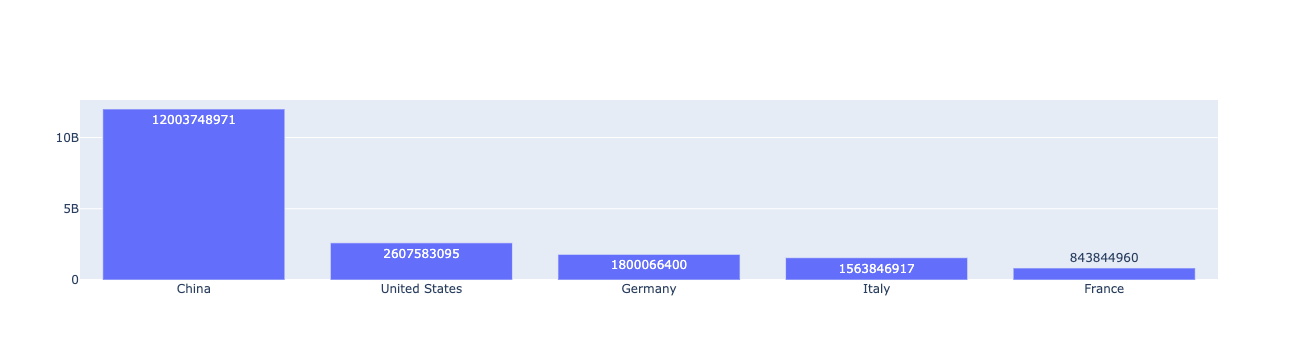

In [15]:
# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x_import, y=y_import,
            text=y_import,
            textposition='auto',
        )])

fig.show(renderer='plotly_mimetype')

### Top 5 - Exporters

In [16]:
soda_top5_exporters = dataframe_countries_commodities(countries_list=all_countries_available_list,category='Chemical Wood Pulp, Soda or Sulphate', type='export',year='2020')
# soda_top5_exporters[0:5]

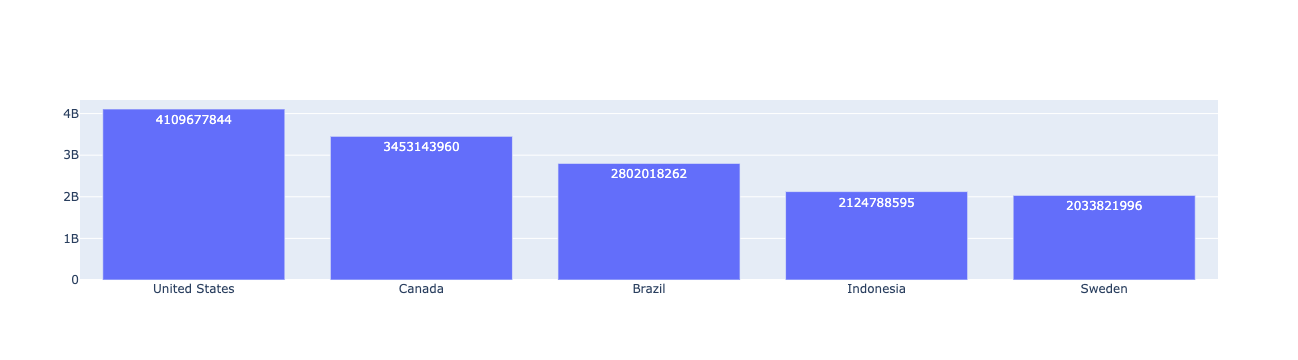

In [17]:
x_export = soda_top5_exporters.index[0:5]
y_export = soda_top5_exporters['value'][0:5]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x_export, y=y_export,
            text=y_export,
            textposition='auto',
        )])

fig.show(renderer='plotly_mimetype')

#### Soda Ash Application

Soda Ash</p>
Derived from the mineral trona, soda ash is used in a wide range of everyday goods, including in the manufacturing of detergents and pharmaceuticals. </p> It can also be used in the manufacture of glass and paper, and in water treatment. 

United States is one of the largest exporters of soda ash across the globe. Soda ash is increasingly being used across several end-use sectors, such as the automotive, water treatment, chemical industries, etc., which is also contributing to the market growth. Furthermore, the growing usage of soda ash in the glass industry is providing a thrust to the market. Besides this, due to the enforcement of stringent regulations by the US government regarding the proper disposal of industrial water, soda ash is utilized in wastewater treatment to control the pH of water and improve the alkalinity of lakes. All the above-mentioned factors are expected to further propel the market growth in the coming years. 

Soda ash performance in recent months can be understood when we place it among the products that had a decrease in demand due to the slowdown in the industry around the world, during the periods of higher quarantine of COVID19. Being present in products from the pharmaceutical segment, glass, paper, etc., a reduction in demand was expected. And now that we have experienced a social reopening and the industry is trying to return to pre-COVID behavior patterns, it is reasonable to expect an increase in demand.

### Soda Ash performance 2017-2021?


In [53]:
soda_ash = te.fetchMarkets(symbol= 'SODASH:COM', initDate='2017-01-30', endDate='2021-10-30', output_type='df')

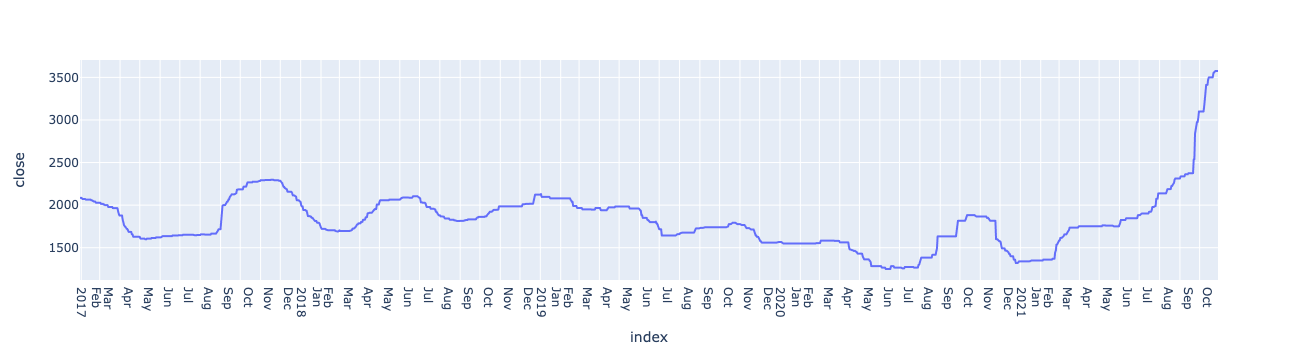

In [58]:


import plotly.express as px
df = soda_ash
fig = px.line(df, x=df.index, y=df.close,
                           )
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show(renderer='plotly_mimetype')

### What to expect to soda ash performance? </p>
In July 2018 we can already see a drop in the price, but it seems more significant that by March 2019 the price starts to suffer the effects of the quarantine.</p> In July 2021, a recovery process begins that should surprise even the most optimistic analysts.</p> If we think that the price increase obeyed the principle of supply and demand, we can assume that the soda ash industrial parks, assuming that there would be a lower demand for the material during the pandemic period, preventively slowed down the production of soda ash. And with the resumption of industrial production of products that require soda ash, there was a shortage of soda ash, and therefore, a natural increase in the price. In recent months, the economic media has been reporting heavy investments by large soda ash producers, which can bring, in a short period of time, an improvement in supply and a rebalancing in price performance. It is important to note that as the price was impacted by COVID19, more specifically by the process of confinement of society, the soda ash industry and investors in this segment need to be sensitive to government policies that are again considering starting new quarantine periods.

In [ ]:
# tennessee.matos@tradingeconomics.com 